<a href="https://colab.research.google.com/github/aquibmoin786/aq/blob/master/Covid_19WorldVaccination_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation and Cleaning
Load the dataset into a data frame using Pandas
Explore the number of rows & columns, ranges of values etc.
Handle missing, incorrect and invalid data

In [1]:
import pandas as pd
import numpy as np

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving country_vaccinations (1).csv to country_vaccinations (1).csv


In [54]:
vacination_df = pd.read_csv('/content/country_vaccinations (1).csv')

In [55]:
vacination_df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4563,Zimbabwe,ZWE,2021-02-24,7872.0,7872.0,NaN,3831.0,1312.0,0.05,0.05,NaN,88.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1366095877...
4564,Zimbabwe,ZWE,2021-02-25,11007.0,11007.0,NaN,3135.0,1572.0,0.07,0.07,NaN,106.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1366095877...
4565,Zimbabwe,ZWE,2021-02-26,12579.0,12579.0,NaN,1572.0,1750.0,0.08,0.08,NaN,118.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1366095877...
4566,Zimbabwe,ZWE,2021-02-27,15705.0,15705.0,NaN,3126.0,2150.0,0.11,0.11,NaN,145.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1366095877...


In [56]:
vacination_df.shape

(4568, 15)

In [57]:
vacination_df.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [58]:
vacination_df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,2.988000e+03,2.541000e+03,1.702000e+03,2.523000e+03,4.409000e+03,2988.000000,2541.000000,1702.000000,4409.000000
mean,1.740127e+06,1.508629e+06,5.065316e+05,7.537966e+04,5.494225e+04,7.183799,5.836820,2.308972,2425.864142
std,5.892341e+06,4.727398e+06,1.971595e+06,2.143469e+05,1.741913e+05,13.346175,9.596546,5.590001,4506.084292
min,0.000000e+00,0.000000e+00,1.000000e+00,-5.001200e+04,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,3.161200e+04,2.818600e+04,1.175550e+04,2.286500e+03,1.122000e+03,0.620000,0.600000,0.230000,315.000000
50%,2.073130e+05,1.832100e+05,5.321200e+04,1.179900e+04,5.721000e+03,2.760000,2.550000,0.860000,1057.000000
75%,8.858422e+05,7.716510e+05,2.704542e+05,5.366500e+04,2.663800e+04,6.850000,5.350000,1.980000,2196.000000
max,7.523600e+07,4.977218e+07,2.477992e+07,2.429823e+06,1.916190e+06,109.250000,69.800000,39.450000,54264.000000


How many vaccines suceesfully lunches in the world.

In [59]:
vacination_df.vaccines.unique()

array(['Pfizer/BioNTech', 'Sputnik V', 'Oxford/AstraZeneca',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Sputnik V',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V',
       'Oxford/AstraZeneca, Sinovac', 'Sinopharm/Beijing',
       'Moderna, Pfizer/BioNTech', 'Pfizer/BioNTech, Sinovac',
       'Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac',
       'Oxford/AstraZeneca, Pfizer/BioNTech', 'Sinovac',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V',
       'Covaxin, Oxford/AstraZeneca',
       'Pfizer/BioNTech, Sinopharm/Beijing',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V',
       'Oxford/AstraZeneca, Sinopharm/Beijing',
       'Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V',
       'Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V', 'Johnson&Johnson',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinopharm/Wuhan, Sputnik V'],
      dtype=object)

In [60]:
vaccine_type = vacination_df.groupby('vaccines').count()
vaccine_type = vaccine_type['source_name']

In [61]:
vaccine_type

vaccines
Covaxin, Oxford/AstraZeneca                                                             45
Johnson&Johnson                                                                         13
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                          1221
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V              63
Moderna, Pfizer/BioNTech                                                               374
Oxford/AstraZeneca                                                                     234
Oxford/AstraZeneca, Pfizer/BioNTech                                                    636
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinopharm/Wuhan, Sputnik V      55
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V                       68
Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V                                          67
Oxford/AstraZeneca, Sinopharm/Beijing                                            

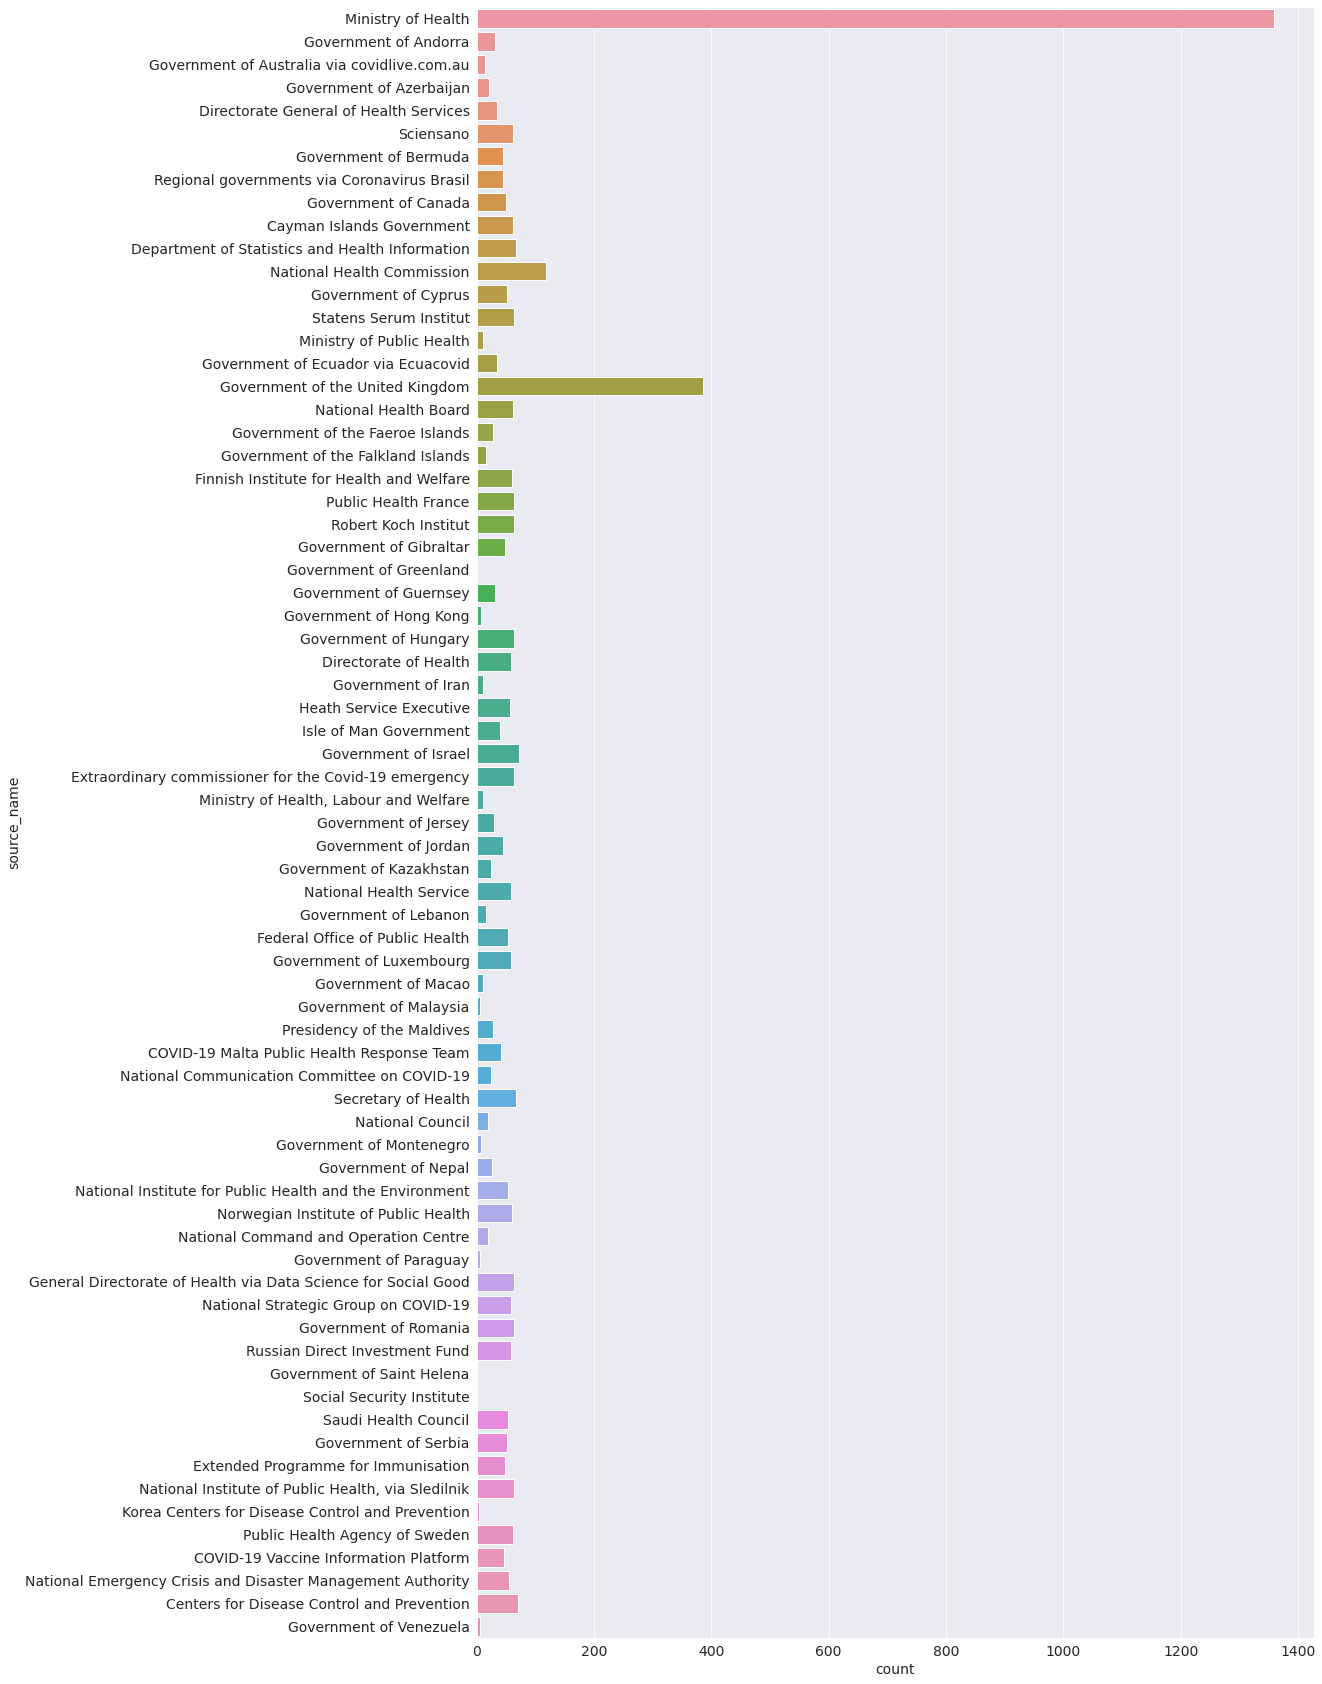

In [62]:
plt.figure(figsize = (15,30))
sns.countplot(y = 'source_name', data = vacination_df)

In [63]:
# to find out the unique value in the data frame and ignore the nan values
vacination_df.nunique()

country                                 117
iso_code                                113
date                                     83
total_vaccinations                     2860
people_vaccinated                      2437
people_fully_vaccinated                1611
daily_vaccinations_raw                 2360
daily_vaccinations                     3355
total_vaccinations_per_hundred         1238
people_vaccinated_per_hundred          1039
people_fully_vaccinated_per_hundred     451
daily_vaccinations_per_million         2376
vaccines                                 22
source_name                              71
source_website                          113
dtype: int64

In [64]:
# check the null values using isnull() function
vacination_df.isnull().sum()

country                                   0
iso_code                                308
date                                      0
total_vaccinations                     1580
people_vaccinated                      2027
people_fully_vaccinated                2866
daily_vaccinations_raw                 2045
daily_vaccinations                      159
total_vaccinations_per_hundred         1580
people_vaccinated_per_hundred          2027
people_fully_vaccinated_per_hundred    2866
daily_vaccinations_per_million          159
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

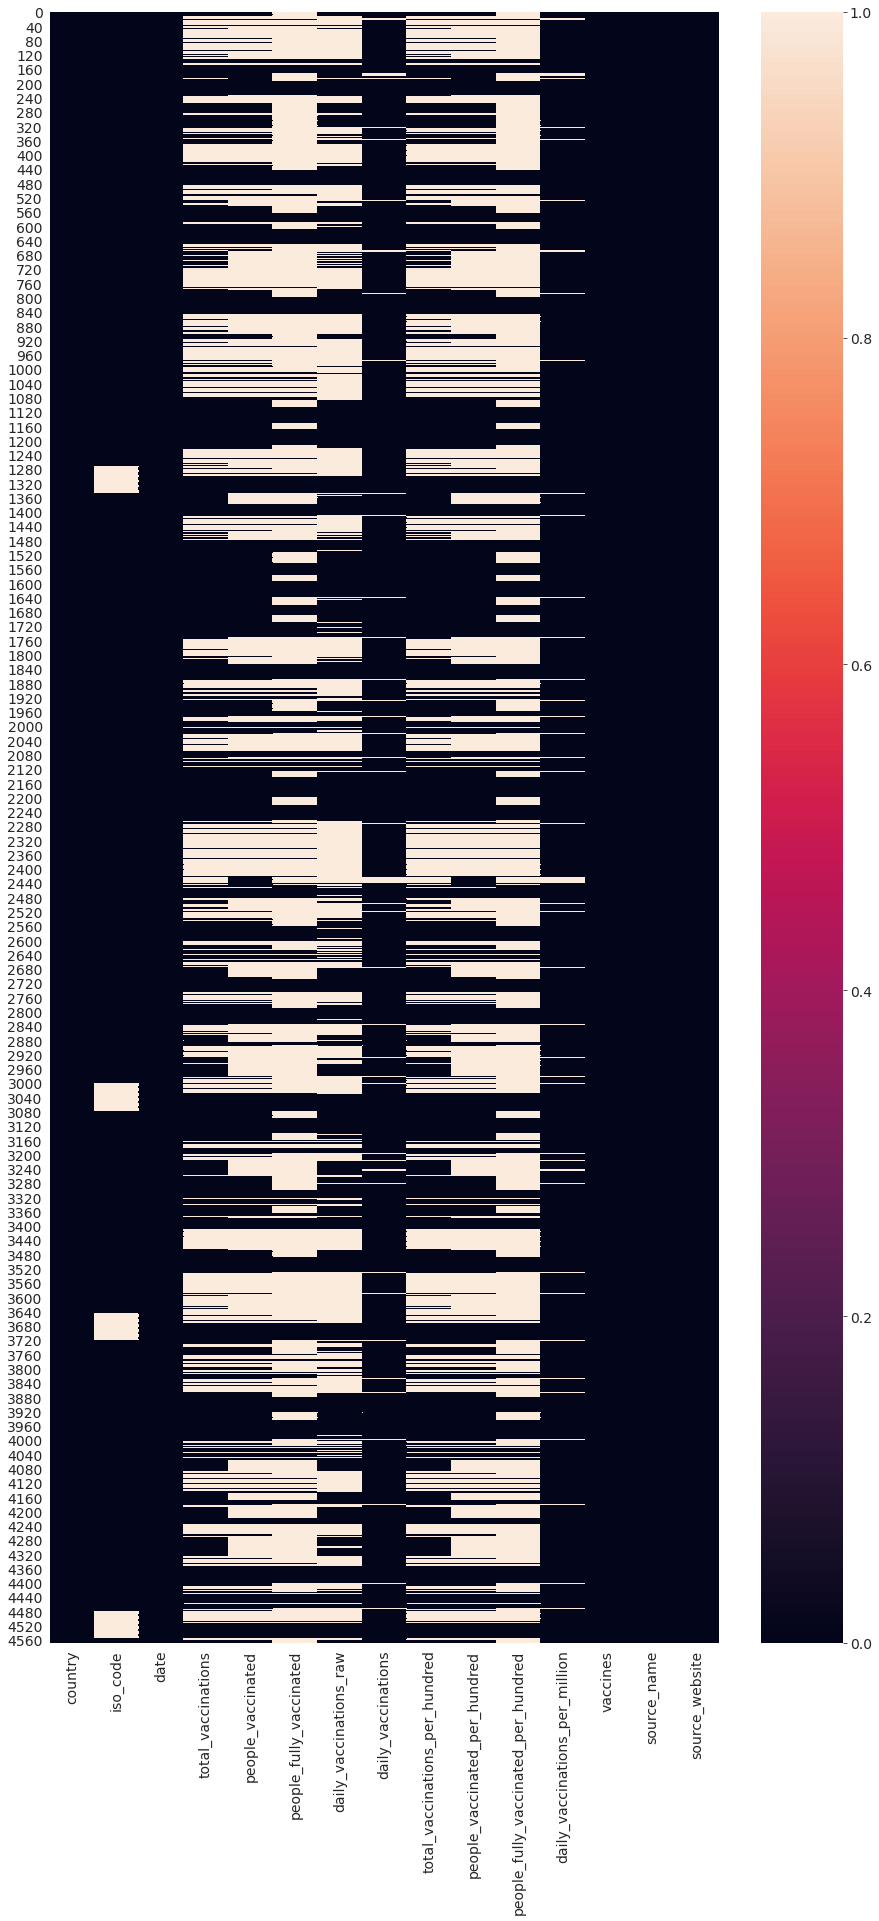

In [65]:
# Through virtual representation
plt.figure(figsize = (15,30))
sns.heatmap(vacination_df.isnull())


In [66]:
# to create a copy
covid_df = vacination_df.copy()

In [67]:
covid_df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4563,Zimbabwe,ZWE,2021-02-24,7872.0,7872.0,NaN,3831.0,1312.0,0.05,0.05,NaN,88.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1366095877...
4564,Zimbabwe,ZWE,2021-02-25,11007.0,11007.0,NaN,3135.0,1572.0,0.07,0.07,NaN,106.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1366095877...
4565,Zimbabwe,ZWE,2021-02-26,12579.0,12579.0,NaN,1572.0,1750.0,0.08,0.08,NaN,118.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1366095877...
4566,Zimbabwe,ZWE,2021-02-27,15705.0,15705.0,NaN,3126.0,2150.0,0.11,0.11,NaN,145.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1366095877...


In [68]:
# To drop the column
covid_df.drop(['source_name', 'source_website'], axis = 1, inplace = True)

In [69]:
covid_df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4563,Zimbabwe,ZWE,2021-02-24,7872.0,7872.0,NaN,3831.0,1312.0,0.05,0.05,NaN,88.0,Sinopharm/Beijing
4564,Zimbabwe,ZWE,2021-02-25,11007.0,11007.0,NaN,3135.0,1572.0,0.07,0.07,NaN,106.0,Sinopharm/Beijing
4565,Zimbabwe,ZWE,2021-02-26,12579.0,12579.0,NaN,1572.0,1750.0,0.08,0.08,NaN,118.0,Sinopharm/Beijing
4566,Zimbabwe,ZWE,2021-02-27,15705.0,15705.0,NaN,3126.0,2150.0,0.11,0.11,NaN,145.0,Sinopharm/Beijing


In [70]:
covid_df['country'].replace(np.NaN, 'World', inplace = True)

In [71]:
covid_df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4563,Zimbabwe,ZWE,2021-02-24,7872.0,7872.0,NaN,3831.0,1312.0,0.05,0.05,NaN,88.0,Sinopharm/Beijing
4564,Zimbabwe,ZWE,2021-02-25,11007.0,11007.0,NaN,3135.0,1572.0,0.07,0.07,NaN,106.0,Sinopharm/Beijing
4565,Zimbabwe,ZWE,2021-02-26,12579.0,12579.0,NaN,1572.0,1750.0,0.08,0.08,NaN,118.0,Sinopharm/Beijing
4566,Zimbabwe,ZWE,2021-02-27,15705.0,15705.0,NaN,3126.0,2150.0,0.11,0.11,NaN,145.0,Sinopharm/Beijing


In [72]:
covid_df.isnull().sum()

country                                   0
iso_code                                308
date                                      0
total_vaccinations                     1580
people_vaccinated                      2027
people_fully_vaccinated                2866
daily_vaccinations_raw                 2045
daily_vaccinations                      159
total_vaccinations_per_hundred         1580
people_vaccinated_per_hundred          2027
people_fully_vaccinated_per_hundred    2866
daily_vaccinations_per_million          159
vaccines                                  0
dtype: int64

#Exploratory Analysis and Visualization
In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization m

Let's begin by importingmatplotlib.pyplot and seaborn.

In [73]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


In [74]:
top_vacination_country = covid_df.groupby('country').count().sort_values('country',ascending = False)
top_vacination_country.reset_index(inplace = True)
top_vacination_country

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,Zimbabwe,11,11,8,8,0,6,10,8,8,0,10,11
1,Wales,0,77,51,51,48,45,76,51,51,48,76,77
2,Venezuela,6,6,2,2,0,0,5,2,2,0,5,6
3,United States,71,71,57,56,42,47,70,57,56,42,70,71
4,United Kingdom,77,77,53,53,50,48,76,53,53,50,76,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,Argentina,62,62,43,37,37,33,61,43,37,37,61,62
113,Anguilla,11,11,3,3,0,1,10,3,3,0,10,11
114,Andorra,31,31,6,6,0,0,30,6,6,0,30,31
115,Algeria,22,22,3,0,0,1,21,3,0,0,21,22


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


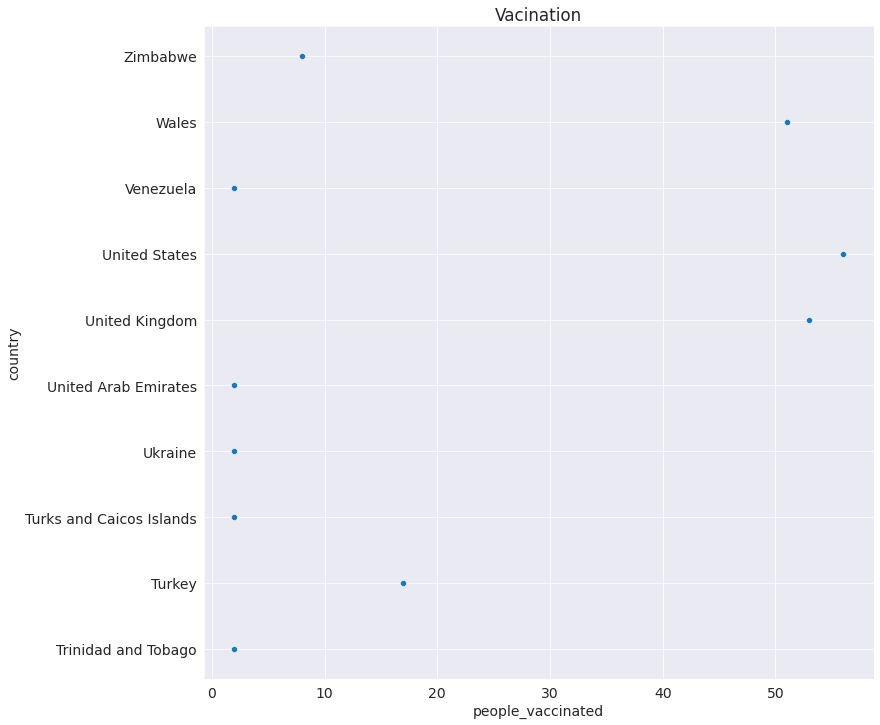

In [75]:
plt.figure(figsize = (12,12))
plt.title('Vacination')
sns.scatterplot(top_vacination_country.people_vaccinated,top_vacination_country.country.head(10));

,country,people_vaccinated
0,Lithuania,83
1,Northern Ireland,77
2,Scotland,77
3,Wales,77
4,United Kingdom,77
...,...,...
112,Ukraine,4
113,Guatemala,3
114,San Marino,1
115,Saint Helena,1


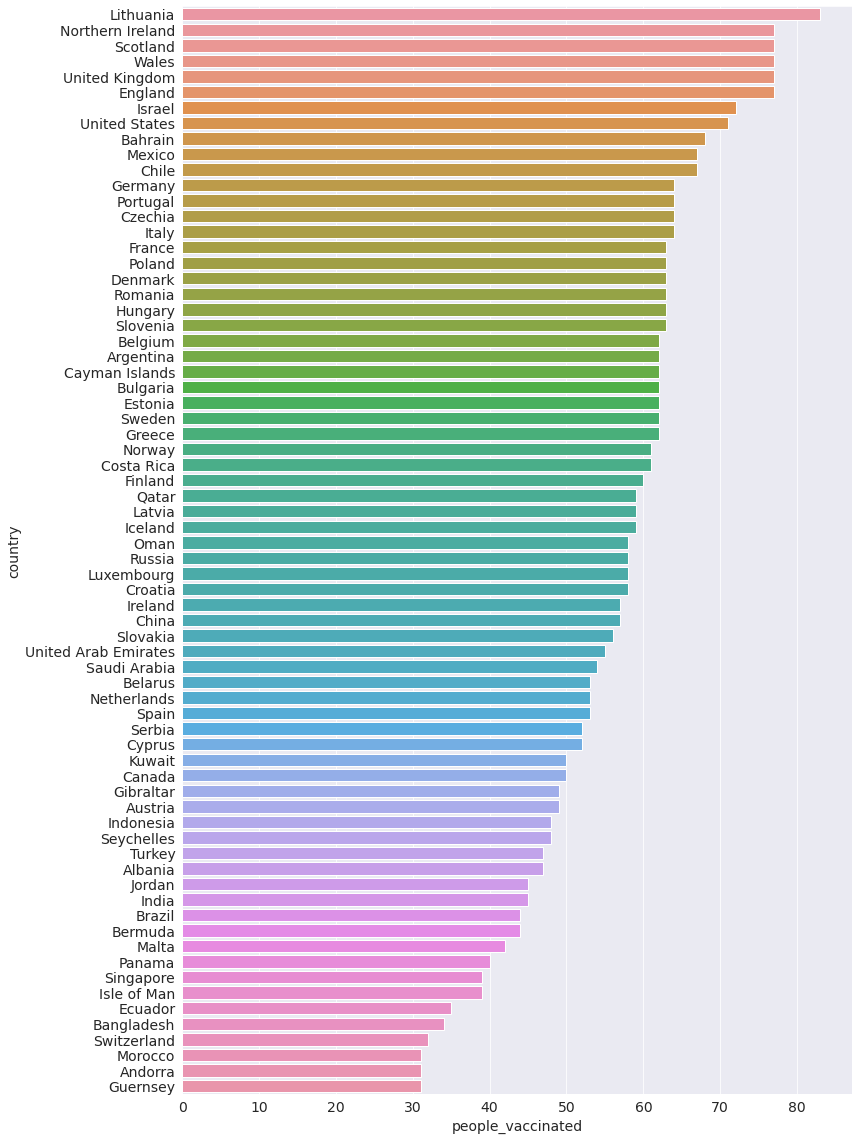

In [76]:
plt.figure(figsize=(12, 20))
top_vacination_country = covid_df['country'].value_counts()
top_vacination_country = pd.DataFrame(top_vacination_country).reset_index()
top_vacination_country.columns = ['country','people_vaccinated']
sns.barplot(y = 'country',x = 'people_vaccinated', data=top_vacination_country.head(70));
top_vacination_country

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


<Figure size 864x1728 with 0 Axes>

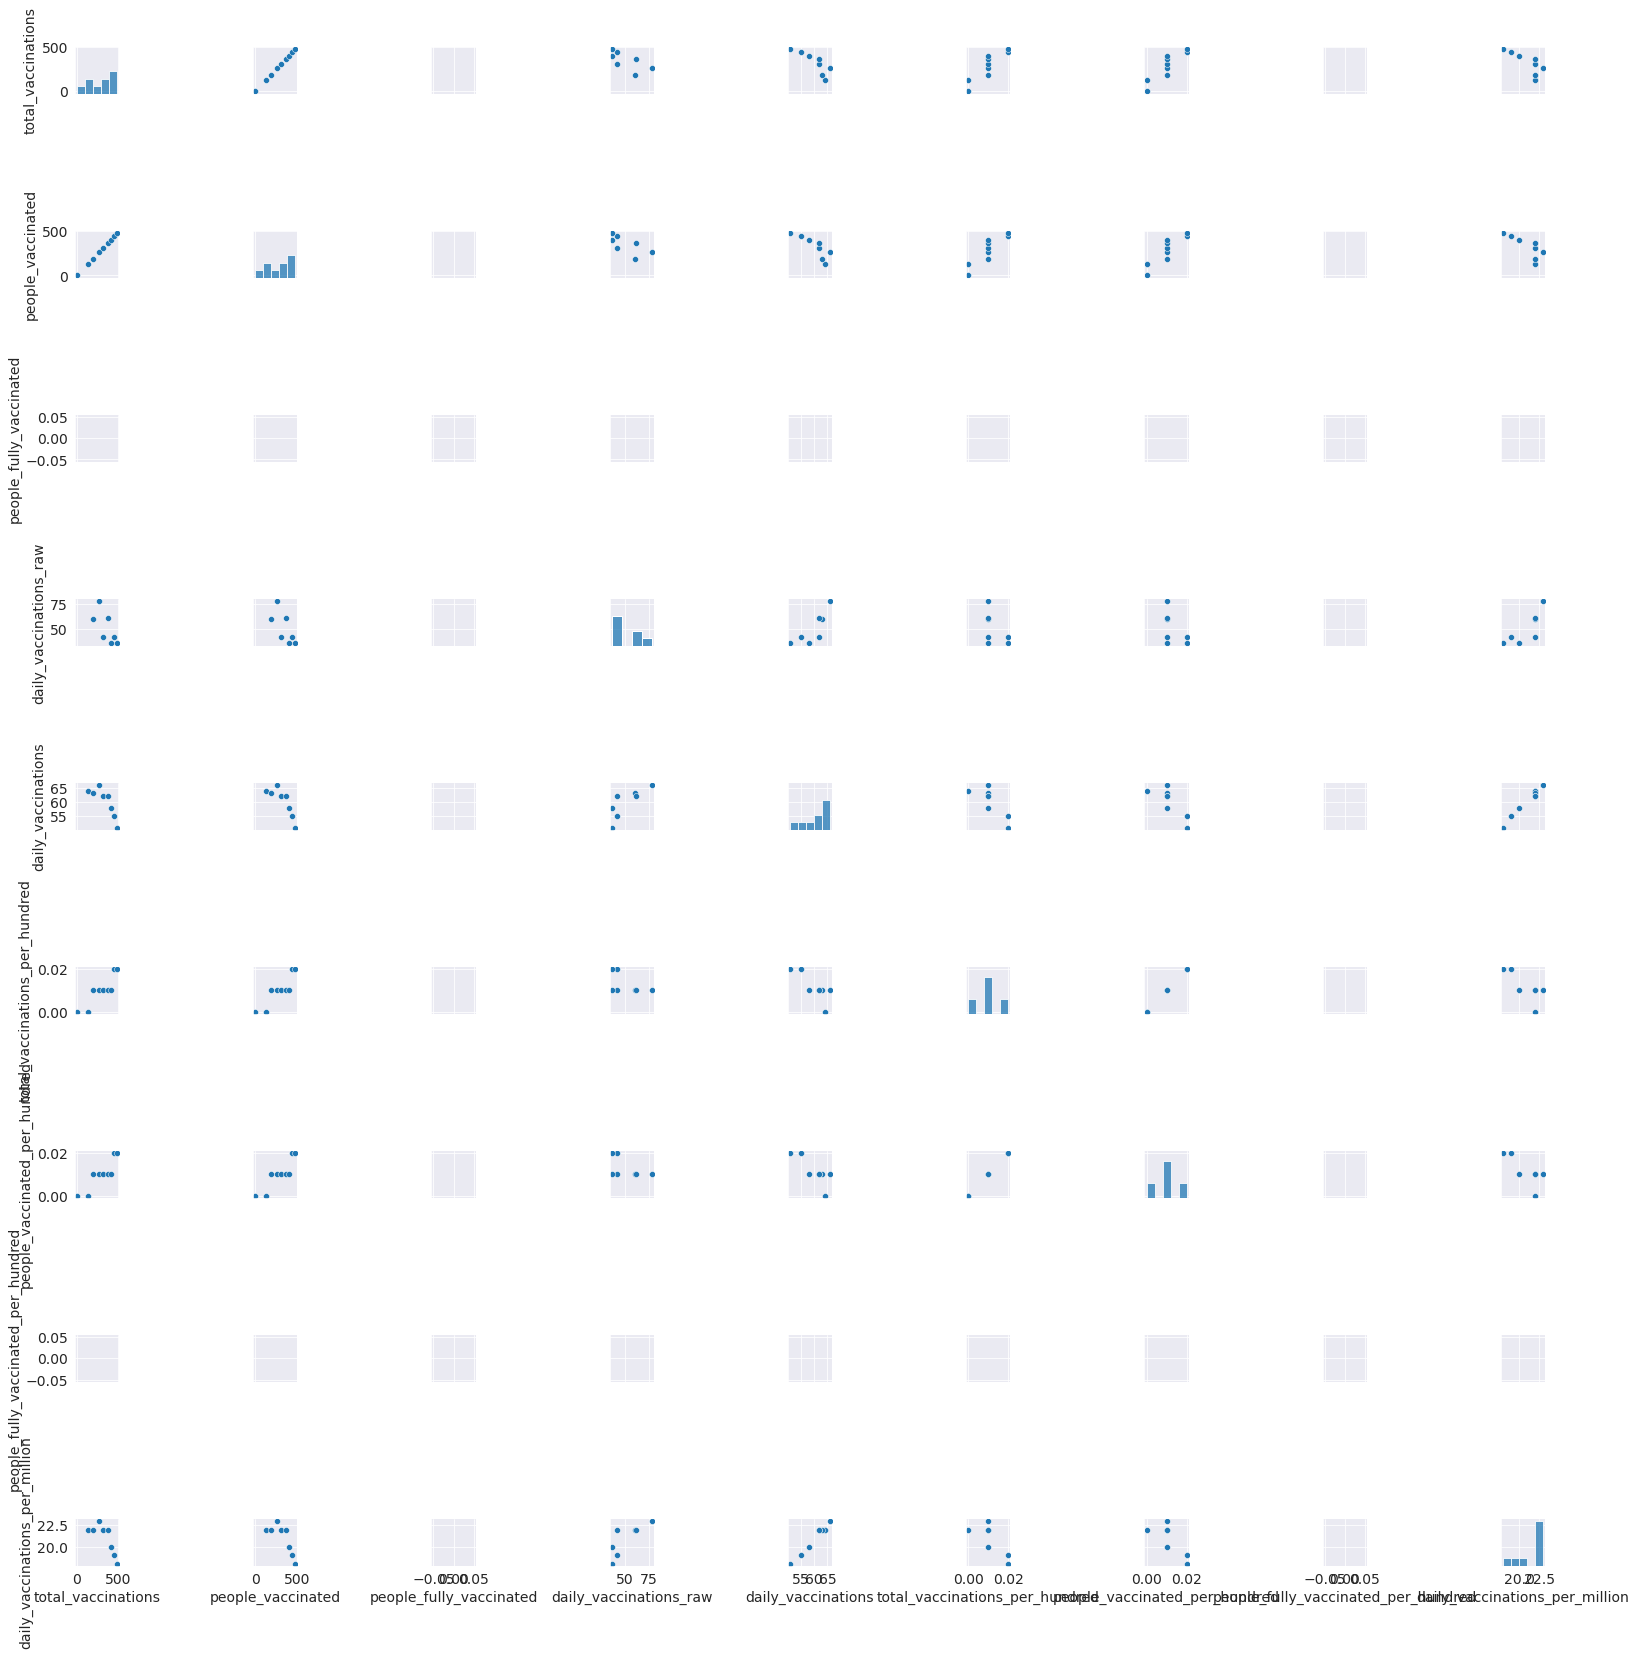

In [88]:
plt.figure(figsize=(12, 24))
sns.pairplot(covid_df.head(10))

In [78]:
covid_df.corr()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
total_vaccinations,1.000000,0.990619,0.925316,0.898335,0.943301,0.189745,0.193604,0.082492,0.113826
people_vaccinated,0.990619,1.000000,0.865199,0.906661,0.955363,0.176459,0.205129,0.051663,0.108538
people_fully_vaccinated,0.925316,0.865199,1.000000,0.808506,0.835668,0.147745,0.126677,0.164582,0.092366
daily_vaccinations_raw,0.898335,0.906661,0.808506,1.000000,0.949885,0.104681,0.115362,0.022880,0.095018
daily_vaccinations,0.943301,0.955363,0.835668,0.949885,1.000000,0.111376,0.125995,0.027934,0.060771
total_vaccinations_per_hundred,0.189745,0.176459,0.147745,0.104681,0.111376,1.000000,0.973212,0.907711,0.822356
people_vaccinated_per_hundred,0.193604,0.205129,0.126677,0.115362,0.125995,0.973212,1.000000,0.791954,0.854033
people_fully_vaccinated_per_hundred,0.082492,0.051663,0.164582,0.022880,0.027934,0.907711,0.791954,1.000000,0.758113
daily_vaccinations_per_million,0.113826,0.108538,0.092366,0.095018,0.060771,0.822356,0.854033,0.758113,1.000000


In [79]:
vacination_plot = vacination_df.groupby(['country','vaccines']).count()   
vacination_plot =vacination_plot['daily_vaccinations_per_million']

In [80]:
vacination_plot

country         vaccines                           
Albania         Pfizer/BioNTech                        40
Algeria         Sputnik V                              21
Andorra         Pfizer/BioNTech                        30
Anguilla        Oxford/AstraZeneca                     10
Argentina       Sputnik V                              61
                                                       ..
United Kingdom  Oxford/AstraZeneca, Pfizer/BioNTech    76
United States   Moderna, Pfizer/BioNTech               70
Venezuela       Sputnik V                               5
Wales           Oxford/AstraZeneca, Pfizer/BioNTech    76
Zimbabwe        Sinopharm/Beijing                      10
Name: daily_vaccinations_per_million, Length: 117, dtype: int64

How to find out the corelation and how to visulization representing.

<Figure size 864x1728 with 0 Axes>

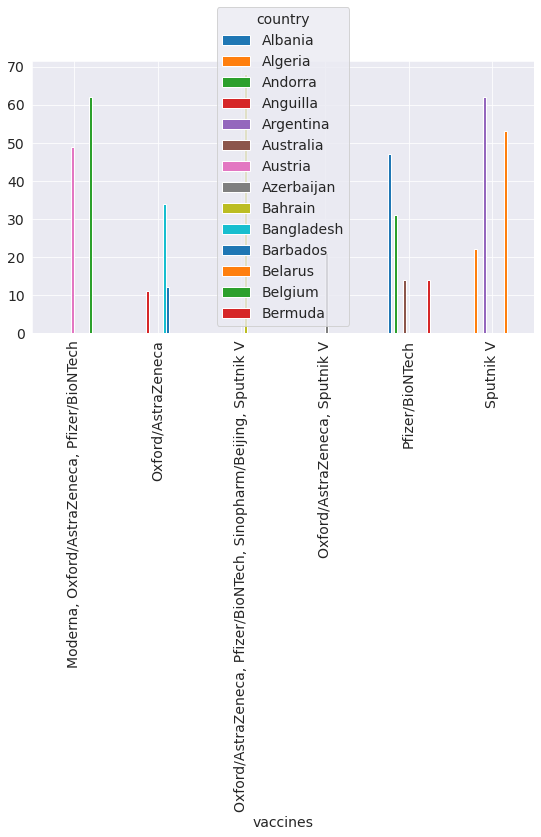

In [81]:
plt.figure(figsize=(12, 24))
pd.crosstab(vacination_df.head(500)[('vaccines')],vacination_df[('country')]).plot.bar()

Relationship between people_vacinated per million

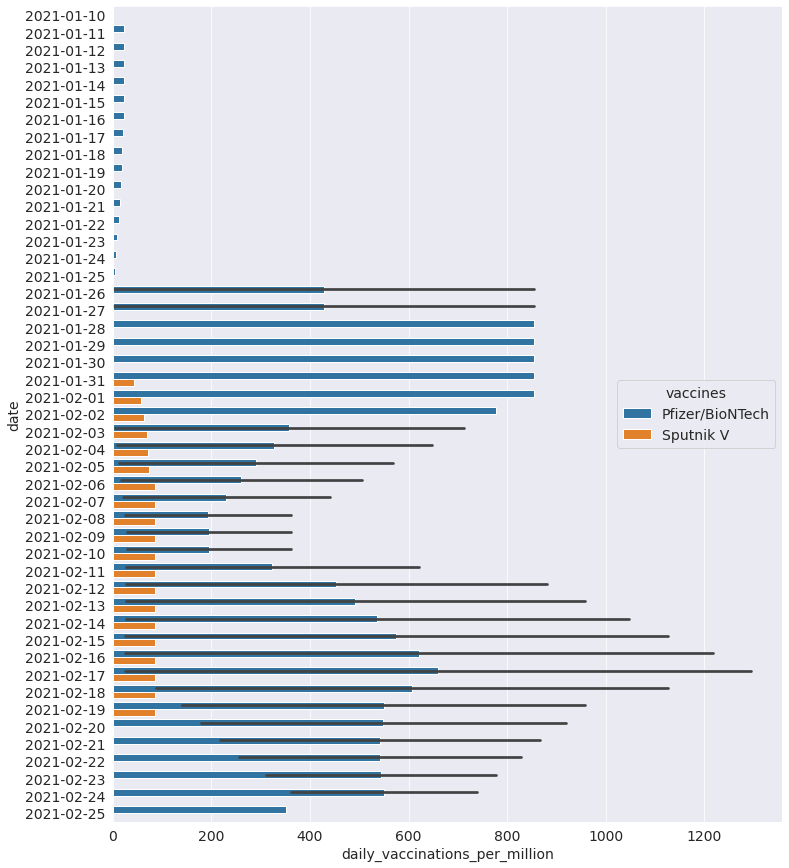

In [82]:
plt.figure(figsize=(12, 15))
sns.barplot(x='daily_vaccinations_per_million', y='date', hue='vaccines', data=vacination_df.head(100));

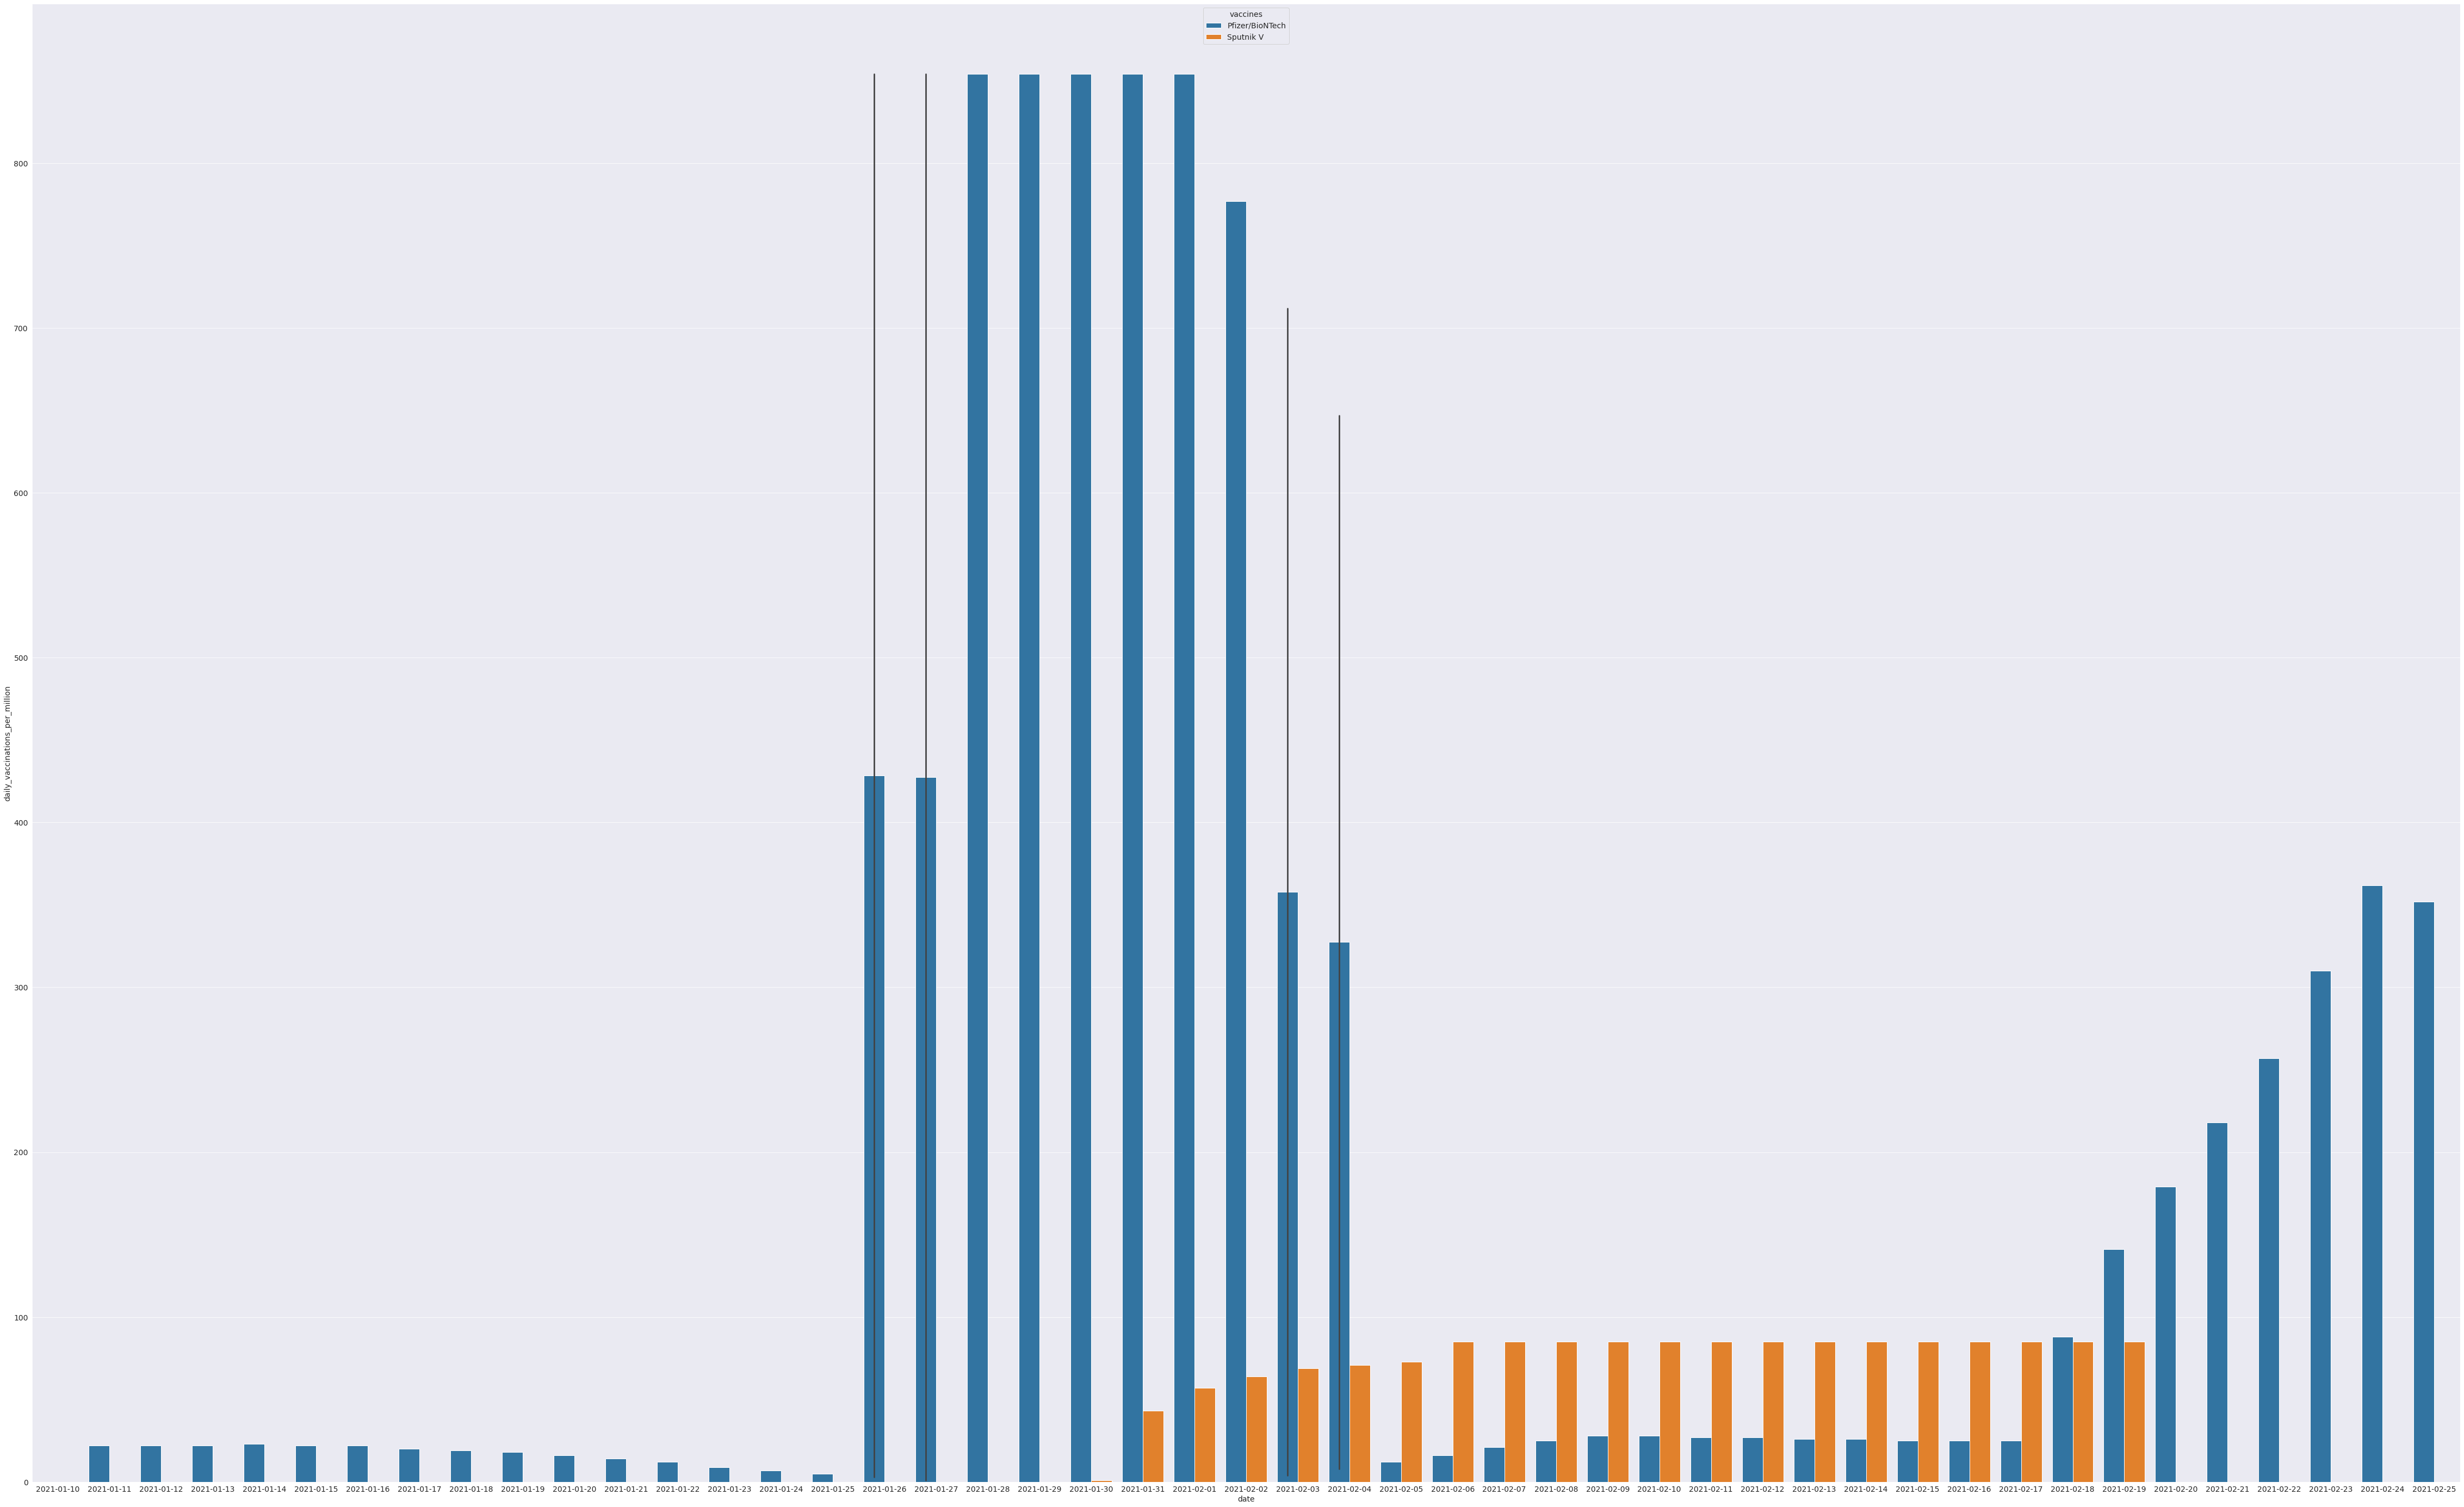

In [83]:
plt.figure(figsize=(80, 50))
sns.barplot(x='date', y='daily_vaccinations_per_million', hue='vaccines', data=vacination_df.head(80));

Visualising diff. in statistics between vaccination vs non vaccination

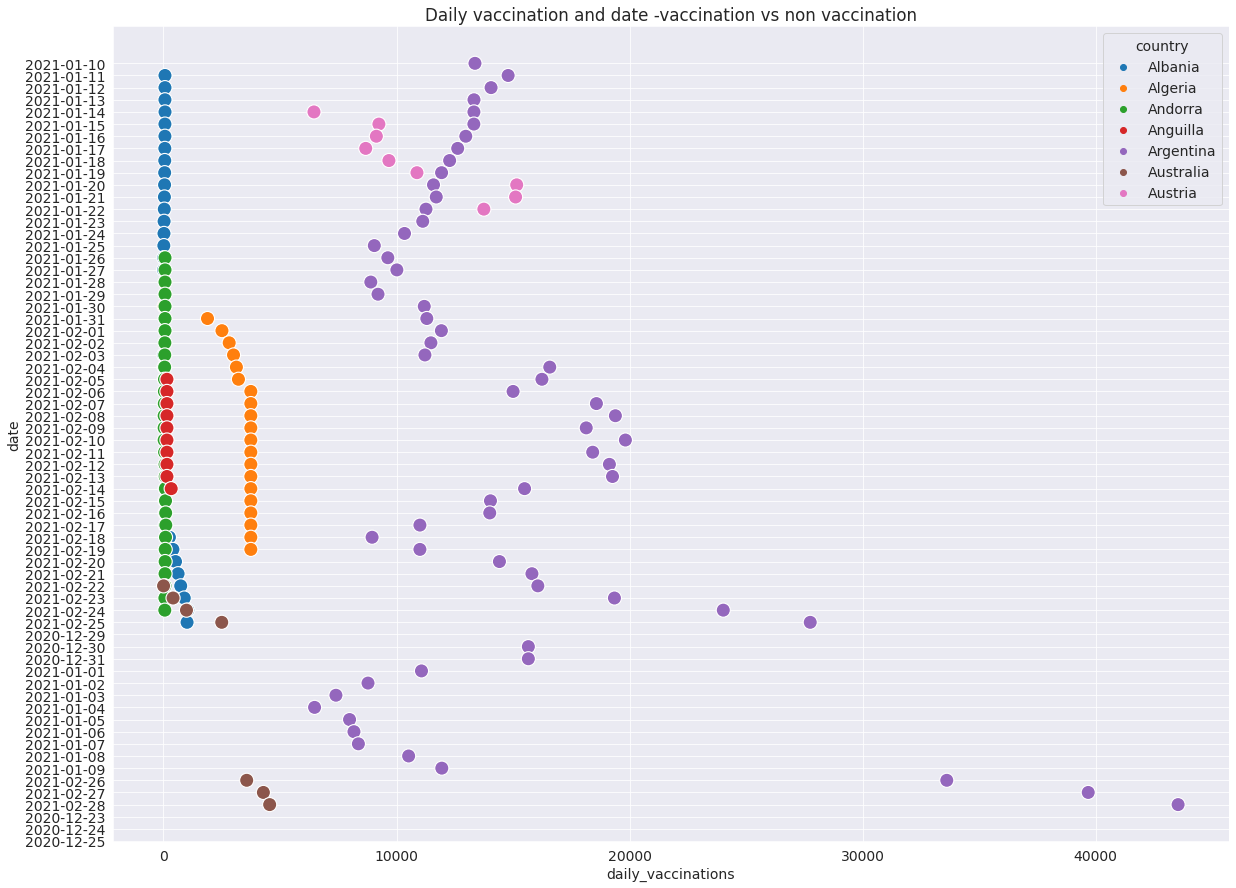

In [84]:
plt.figure(figsize=(20, 15))
sns.scatterplot(x = vacination_df.daily_vaccinations, # X-axis
                y = vacination_df.date,  # Y-axis
                hue= vacination_df.country.head(200),  # Dot color
                s=200);

plt.title('Daily vaccination and date -vaccination vs non vaccination');

In [85]:
average_stats = vacination_df.groupby('vaccines').mean()

In [86]:
average_stats

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
vaccines,,,,,,,,,
"Covaxin, Oxford/AstraZeneca",6.047394e+06,5.669789e+06,1.107643e+06,329451.166667,306434.454545,0.438409,0.410682,0.080000,222.022727
Johnson&Johnson,3.215783e+04,3.215783e+04,3.508127e+04,6826.700000,4645.833333,0.054167,0.054167,0.059091,78.416667
"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",6.592162e+05,5.030670e+05,2.626868e+05,28844.123523,23083.451312,2.896429,2.152455,1.122817,1091.052498
"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V",3.121991e+05,3.089162e+05,1.075340e+05,16080.410714,12715.387097,3.231525,3.197143,1.112619,1316.209677
"Moderna, Pfizer/BioNTech",6.623952e+06,5.779483e+06,2.712642e+06,246934.505017,220079.895317,13.718593,10.858819,6.782576,3905.710744
Oxford/AstraZeneca,2.756861e+05,4.368813e+05,NaN,27837.182796,17910.022936,3.757907,3.400484,NaN,4942.577982
"Oxford/AstraZeneca, Pfizer/BioNTech",2.661179e+06,2.542711e+06,1.522252e+05,99300.959459,64267.523962,11.638456,10.696969,1.133684,3154.610224
"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinopharm/Wuhan, Sputnik V",3.511145e+06,2.158492e+06,1.218924e+06,97021.895833,94751.555556,35.500385,21.825000,12.325000,9580.129630
"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V",1.605414e+05,1.605414e+05,NaN,3891.524590,4010.597015,9.435238,9.435238,NaN,2357.000000


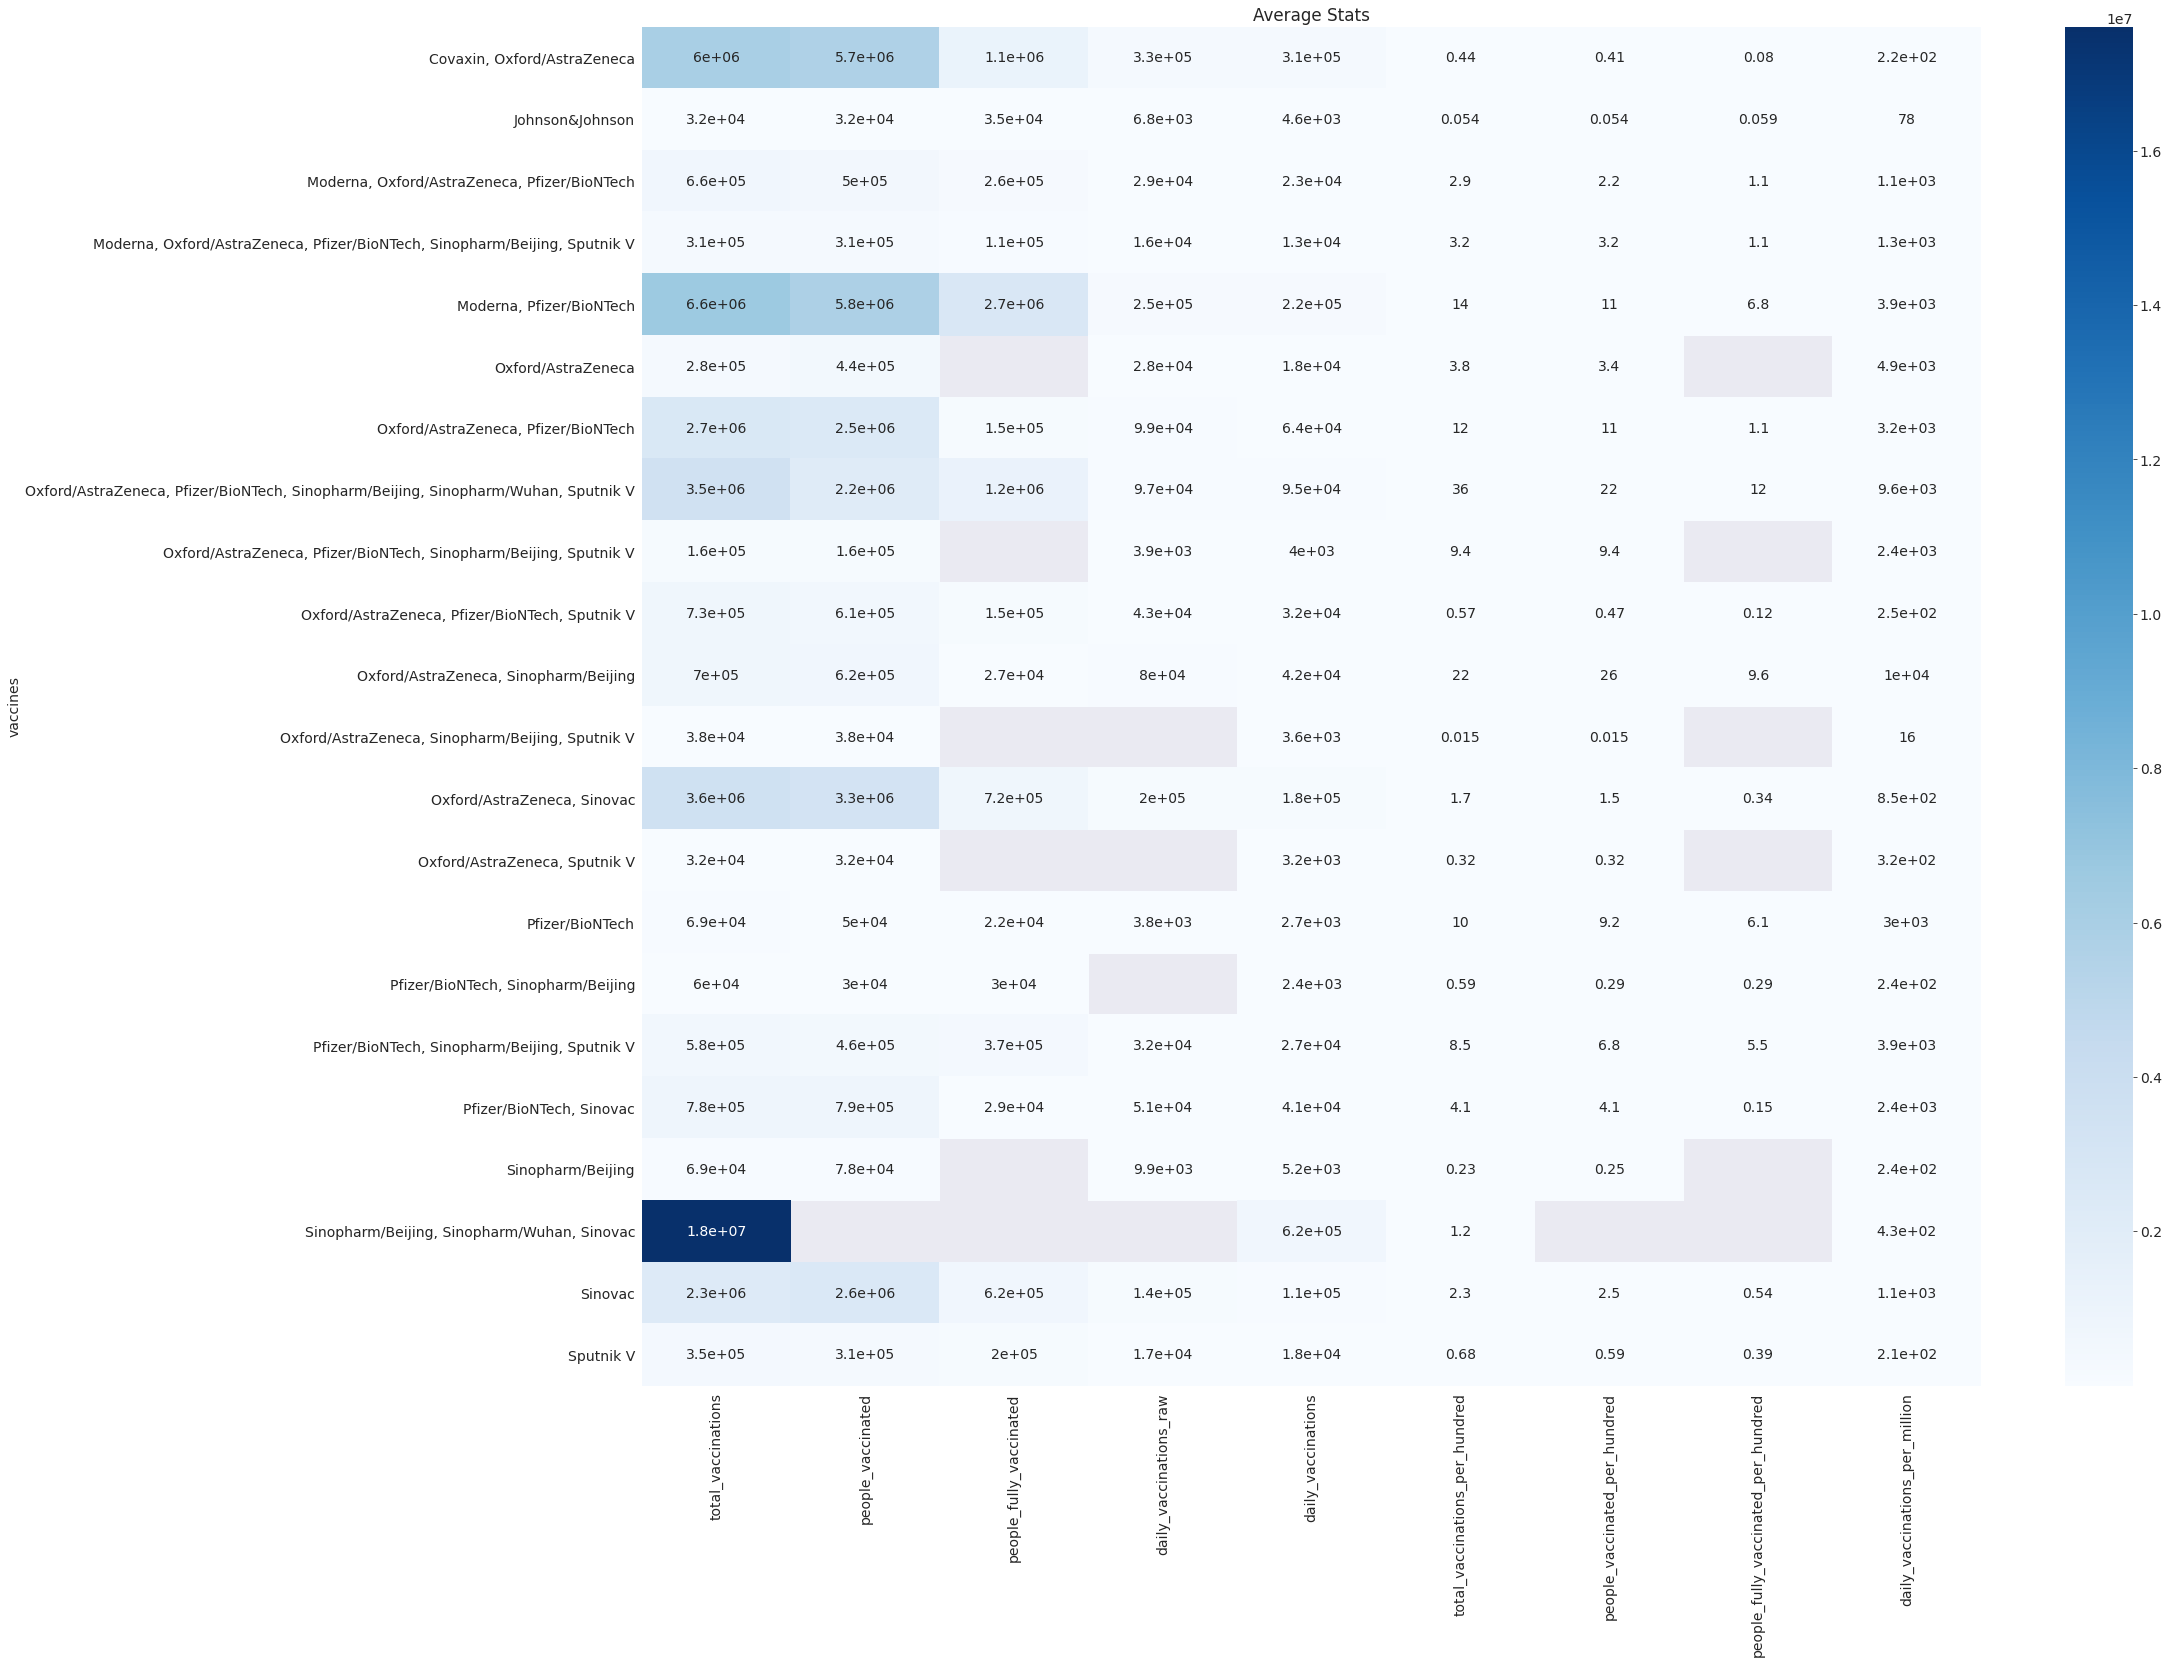

In [87]:
plt.figure(figsize=(30, 25))
plt.title("Average Stats")
sns.heatmap(average_stats, annot=True, cmap='Blues')

#Conclusion
In this, I'm choosing real time data and analysis of data with various calculation performed in this task that is which country to successfully vaccinated to the people. According to the heat map I learn in this chapter to how to successfully vaccines trial to the people. In this project, exhaustive number of graphs can be plotted, howeverhowever could not be done due to time constraint.

# References

W3Schools \
geeksforgeeks \


#My Idea for the Future Work
As I come from Computer Science, Mathematics and Statistics field, one can perform how to verified brain cancer in initial State.